In [15]:

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
# define data

def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_bollinger_bands(data, window=20, num_std_dev=2):
    data['Rolling Mean'] = data['Close'].rolling(window=window).mean()
    data['Upper Band'] = data['Rolling Mean'] + (data['Close'].rolling(window=window).std() * num_std_dev)
    data['Lower Band'] = data['Rolling Mean'] - (data['Close'].rolling(window=window).std() * num_std_dev)
    return data

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['Rolling Mean'], label='Rolling Mean', color='black')
    plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='dashed')
    plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='dashed')
    plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.2)
    plt.title('Bollinger Bands Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def bollinger_band_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0.0


In [ ]:
   # Buy Signal
    signals['Signal'][data['Close'] < data['Lower Band']] = 1.0

    # Sell Signal
    signals['Signal'][data['Close'] > data['Upper Band']] = -1.0

    return signals


[*********************100%%**********************]  1 of 1 completed


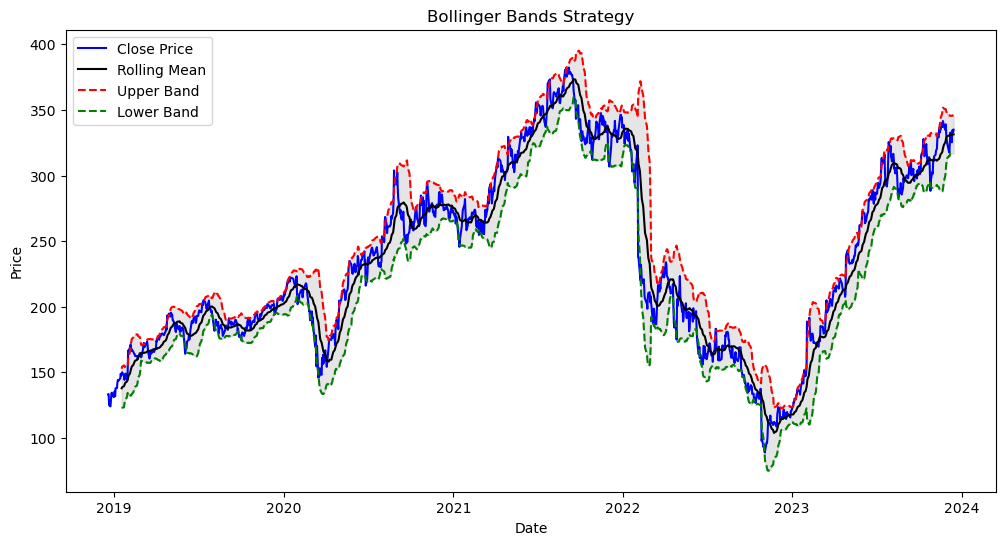

            Signal
Date              
2018-12-19     0.0
2018-12-20     0.0
2018-12-21     0.0
2018-12-24     0.0
2018-12-26     0.0
...            ...
2023-12-11     0.0
2023-12-12     0.0
2023-12-13     0.0
2023-12-14     0.0
2023-12-15     0.0

[1257 rows x 1 columns]


In [16]:
 # Define the stock ticker, start date, and end date
if __name__ == "__main__":
    
    stock_ticker = 'META'
    start_date = '2018-12-19'
    end_date = '2023-12-18'

    # Fetch historical stock data
    stock_data = fetch_data(stock_ticker, start_date, end_date)

    # Calculate Bollinger Bands
    stock_data = calculate_bollinger_bands(stock_data)

    # Plot Bollinger Bands
    plot_bollinger_bands(stock_data)

    # Generate signals based on Bollinger Bands
    signals = bollinger_band_strategy(stock_data)

    # Print signals
    print(signals)
